## Regresión logistica

#### Librerías

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
import pandas as pd
from sklearn.decomposition import PCA, IncrementalPCA, KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


#### Dataset 

In [3]:
df = pd.read_csv("/home/alejandro/proyectos/platzi/ia/machine_learning/regre_ro/Datasets/heart.csv")

#### Análisis del dataset

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000

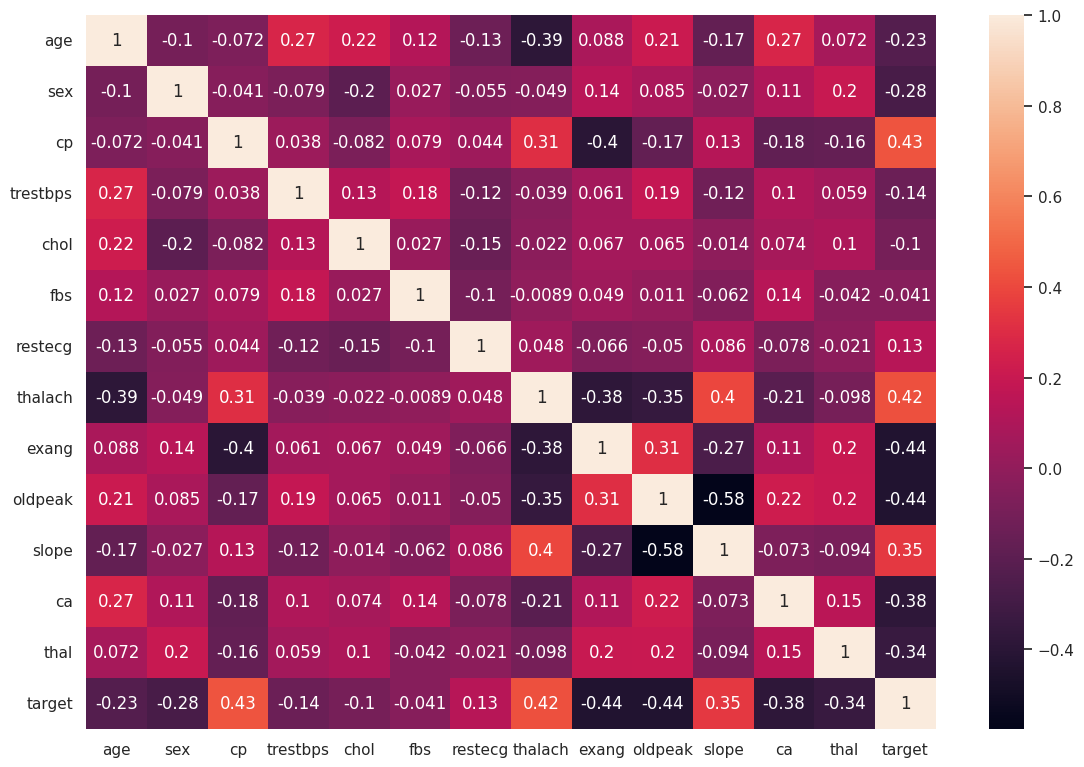

In [7]:
print(df.head())
print()
print(df.describe())
print()
print(df.info())

cor = df.corr()
sns.heatmap(cor, annot=True)
sns.set(rc={'figure.figsize': (13.7, 9.27)})

plt.show()

#### Preprocesamiento

In [5]:
df_feactures = df.drop(["target"], axis=1)
df_target = df["target"]

df_feactures = StandardScaler().fit_transform(df_feactures)

#### Entrenamiento

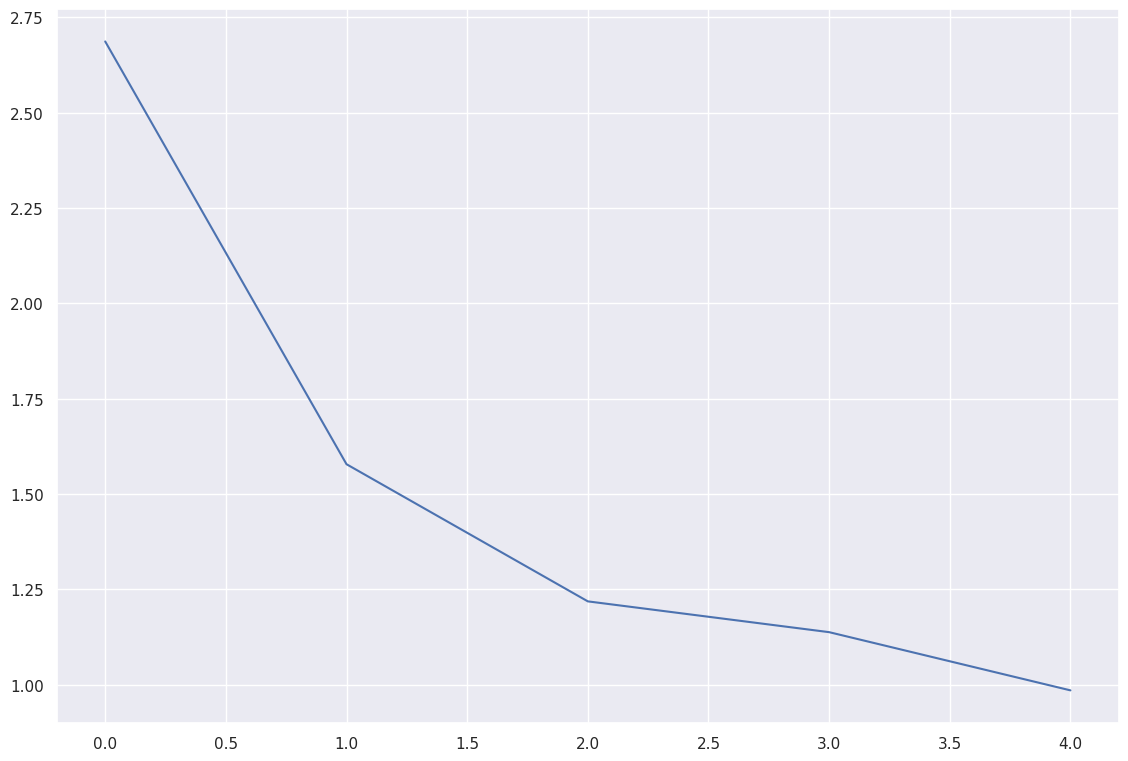

Score pca:  0.827922077922078
Score ipca:  0.8051948051948052
Score kpca:  0.814935064935065


In [13]:
x_train, x_test, y_train, y_test = train_test_split(df_feactures, df_target, test_size=0.3, random_state=42)

pca = PCA(n_components=5)
pca.fit(x_train) 

ipca = IncrementalPCA(n_components=5, batch_size=10)
ipca.fit(x_train) 

kpca = KernelPCA(n_components=5, kernel="rbf")
kpca.fit(x_train)

plt.plot(range(len(pca.explained_variance_)),pca.explained_variance_)
plt.show()

regre = LogisticRegression(solver="lbfgs")

d_train = pca.transform(x_train)
d_test = pca.transform(x_test)
regre.fit(d_train, y_train)
print("Score pca: ", regre.score(d_test,y_test))

d_train = ipca.transform(x_train)
d_test = ipca.transform(x_test)
regre.fit(d_train, y_train)
print("Score ipca: ", regre.score(d_test,y_test))

d_train = kpca.transform(x_train)
d_test = kpca.transform(x_test)
regre.fit(d_train, y_train)
print("Score kpca: ", regre.score(d_test,y_test))